<a href="https://colab.research.google.com/github/claudioalvesmonteiro/machinelearning-CNPJ/blob/master/modelos/MODELO_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   # Projeto Machine Learning para Análise de Crédito
   
   ## Modelo de Regressão Logística
   
    Equipe:
    Claudio Alves Monteiro
    Marcos Antonio Almeida Souto Júnior
    Virgínia Heimann
    Kayo Renato da Silva Nascimento
    Rosely Cabral
   


### Configurar Spark

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://mirror.nbtelecom.com.br/apache/spark/spark-2.4.3/spark-2.4.3-bin-hadoop2.7.tgz
!tar xf spark-2.4.3-bin-hadoop2.7.tgz
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.3-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [0]:
# importar pacotes
import os
import pandas as pd
from pyspark.sql import functions as SF
import pyspark.sql.types as ST

### Importar dados

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# import data
path = 'drive/My Drive/Colab Notebooks/ProjetoCESARSchool/codes/data/'

df = spark.read.csv(path+'model_data5.csv',
                    sep=',',
                    encoding='utf-8',
                    header=True,
                    inferSchema=True)

In [0]:
# rename CS_ALVO as label
df = df.withColumnRenamed('CS_ALVO', 'label')
df.show(5)

+---+--------------+--------+-----+----------+--------------------+--------------------+----------+------------------------+-------------------------+-------------------------------+--------------+----------------+--------+------------------+-------------------+-----------------------+------------------+--------------------+-------------------------+----------------------+----------------------------+--------------------+-------------------+-------------------+-------------------+-------------------+
|_c0|          CNPJ|DATA_REF|label|QTD_SOCIOS|      CAPITAL_SOCIAL|               IDADE|tipo_index|natureza_socied_limitada|natureza_empresario_indiv|natureza_empresa_indiv_limitada|situacao_ativa|situacao_baixada|UF_index|atividade_alimento|          populacao|municipio_metropolitano|      dist_capital|      area_municipio|taxa_atividade_18anosmais|porcent_pop_saneamento|porcent_mulheres10a17_filhos|mortalidade_infantil|               IDHM|         IDHM_renda| taxa_analfabetismo|     porc

## Construção do Modelo

In [0]:
# ENCODE 
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoderEstimator

encoder = OneHotEncoderEstimator(inputCols=['UF_index'],
                                 outputCols=['UF_encoded'])

model = encoder.fit(df)
df = model.transform(df)

In [0]:
df = df.withColumn('populacao', SF.col('populacao').cast('double'))
df = df.withColumn('taxa_analfabetismo', SF.col('taxa_analfabetismo').cast('double'))


In [0]:
#======== VECTOR ASSEMBLER

from pyspark.ml.feature import VectorAssembler



inputcol = ['QTD_SOCIOS', 
           'CAPITAL_SOCIAL', 'IDADE', 'tipo_index', 
           'natureza_socied_limitada', 'natureza_empresario_indiv',
           'situacao_ativa',
           'situacao_baixada', 'UF_encoded', 'populacao',
           'municipio_metropolitano','dist_capital','area_municipio',
           'taxa_atividade_18anosmais','porcent_pop_saneamento',
            'porcent_mulheres10a17_filhos','mortalidade_infantil','IDHM',
           'IDHM_renda','taxa_analfabetismo','porcent_pobres']

# RESULTADO (INADIMPLENCIA DOS 10% MELHORES RANKEADOS) 1: 6.863796537459782
# DA SEGUNDA VEZ O RESULTADO FOI DIFERENTE!!! TERIA QUE TENTAR USAR UMA SEMENTE
# OU FAZER CROSSVALIDATION.




'''
inputcol = ['QTD_SOCIOS', 
           'CAPITAL_SOCIAL', 'IDADE', 'tipo_index', 
           'natureza_socied_limitada', 'natureza_empresario_indiv',
           'natureza_empresa_indiv_limitada', 'situacao_ativa',
           'situacao_baixada', 'UF_encoded', 'atividade_alimento', 'populacao',
           'municipio_metropolitano','dist_capital','area_municipio',
           'taxa_atividade_18anosmais','porcent_pop_saneamento',
           'porcent_mulheres10a17_filhos','mortalidade_infantil','IDHM',
           'IDHM_renda','taxa_analfabetismo','porcent_pobres']



# RESULTADO (INADIMPLENCIA DOS 10% MELHORES RANKEADOS) 2: 7.170216025739237                 

'''

'''
inputcol = ['QTD_SOCIOS', 
           'CAPITAL_SOCIAL', 'IDADE', 'tipo_index', 
           'natureza_socied_limitada', 'natureza_empresario_indiv',
           'situacao_ativa',
           'situacao_baixada', 'UF_encoded', 'populacao',
           'municipio_metropolitano','dist_capital','area_municipio',
           'taxa_atividade_18anosmais','porcent_pop_saneamento',
           'porcent_mulheres10a17_filhos','mortalidade_infantil','IDHM',
           'IDHM_renda','taxa_analfabetismo']

# RESULTADO (INADIMPLENCIA DOS 10% MELHORES RANKEADOS) 3: 7.216178948981156
'''


'''
inputcol = ['QTD_SOCIOS', 
           'CAPITAL_SOCIAL', 'IDADE', 'tipo_index', 
           'natureza_socied_limitada', 'natureza_empresario_indiv',
           'situacao_baixada', 'UF_encoded', 'populacao',
           'municipio_metropolitano','dist_capital','area_municipio',
           'taxa_atividade_18anosmais','porcent_pop_saneamento',
           'mortalidade_infantil',
           'IDHM_renda','taxa_analfabetismo','porcent_pobres']


# RESULTADO (INADIMPLENCIA DOS 10% MELHORES RANKEADOS) 4: 7.323425769878964
'''

'''
inputcol = ['QTD_SOCIOS', 
           'CAPITAL_SOCIAL', 'IDADE', 'tipo_index', 
           'natureza_socied_limitada', 'natureza_empresario_indiv',
           'natureza_empresa_indiv_limitada', 'situacao_ativa',
           'situacao_baixada', 'UF_encoded', 'atividade_alimento']


# RESULTADO (INADIMPLENCIA DOS 10% MELHORES RANKEADOS) 5: 7.445993565190746
'''

'''
inputcol = ['QTD_SOCIOS', 
           'CAPITAL_SOCIAL', 'IDADE', 'tipo_index', 
           'natureza_socied_limitada', 'natureza_empresario_indiv',
           'natureza_empresa_indiv_limitada', 'situacao_ativa',
           'situacao_baixada', 'UF_encoded', 'atividade_alimento', 'populacao']


# RESULTADO (INADIMPLENCIA DOS 10% MELHORES RANKEADOS) 6: 8.319289106787192
'''

assembler = VectorAssembler(
    inputCols = inputcol,
    outputCol = "features")

dataModel = assembler.transform(df)

dataModel = dataModel.select('features', 'label')

dataModel.show(5, truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|features                                                                                                                                                                                                                                                                                                                                  |label|
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [0]:
dataModel.show(20, truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|features                                                                                                                                                                                                                                                                                                                                  |label|
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [0]:
#dataModel = dataModel.filter('label != " "')

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = dataModel.randomSplit([0.7, 0.3])

trainingData.show(5, truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|features                                                                                                                                                                                                                                                                                                                                                 |label|
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [0]:
# funcao para contagem de valores categoricos
def countGenTab(df, column):
    # groupby, count and sort pyspark
    tab = df.select(column).groupby(column).count().alias('count').sort('count', ascending=False)
    # transform to pandas df
    tab = tab.toPandas()
    # calculate proportion
    tab['prop'] = round(tab['count']/sum(tab['count'])*100, 2)
    return tab


In [0]:
countGenTab(trainingData, 'label')

,label,count,prop
0,0,39955,88.57
1,1,5155,11.43


In [0]:
dif = trainingData.where(SF.col('label')==0).count()-trainingData.where(SF.col('label')==1).count()

# filtrar casos onde alvo == 1
alvo = trainingData.filter(trainingData.label == 1)

# adicionar 10 amostras de 1000 casos do alvo a df
amostra = spark.createDataFrame(alvo.rdd.takeSample(True, dif, seed=0))
trainingData = trainingData.union(amostra)

In [0]:
countGenTab(trainingData, 'label')

,label,count,prop
0,0,39955,50.0
1,1,39955,50.0


In [0]:
testData.count()

19613

In [0]:
# import 
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorIndexer, VectorAssembler

# definir modelo
#lr = LogisticRegression(maxIter=10, regParam=0.3)
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=50, regParam=0.3)

# fit no modelo
lrModel = lr.fit(trainingData)

# previsao
predictions = lrModel.transform(testData)

In [0]:
# Select example rows to display.
predictions.select("prediction", "label", "features").show(5)

+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       1.0|    0|(32,[0,1,2,3,4,6,...|
|       0.0|    0|(32,[0,1,2,3,4,6,...|
|       0.0|    0|(32,[0,1,2,3,4,6,...|
|       0.0|    0|(32,[0,1,2,3,4,6,...|
|       0.0|    0|(32,[0,1,2,3,4,6,...|
+----------+-----+--------------------+
only showing top 5 rows



## Evaluate Model


In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
accuracy

0.5976648141538775

In [0]:
'''
import math
for x in range(len(lrModel.coefficients)):
    feature = inputcol[x]
    coef = lrModel.coefficients[x]
    print(str(coef))
    exp = math.exp(coef)
    percent = (exp-1)*100
    print(str(round(coef, 4))+ ' /x=' + str(x) +' /Exponential: '+str(round(exp, 4))+' /Percent of Effect: '+str(round(percent, 4))+'%')
'''

"\nimport math\nfor x in range(len(lrModel.coefficients)):\n    feature = inputcol[x]\n    coef = lrModel.coefficients[x]\n    print(str(coef))\n    exp = math.exp(coef)\n    percent = (exp-1)*100\n    print(str(round(coef, 4))+ ' /x=' + str(x) +' /Exponential: '+str(round(exp, 4))+' /Percent of Effect: '+str(round(percent, 4))+'%')\n"

# Métricas 
**Beta Coefficients**


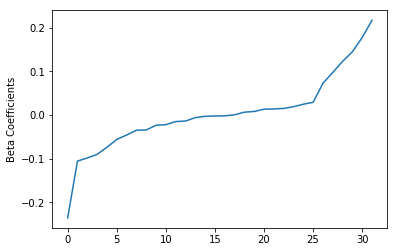

In [0]:
#Beta Coefficients

import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

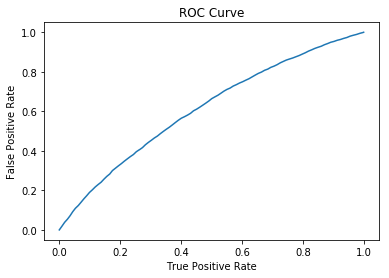

Training set areaUnderROC: 0.6123579782479917


In [0]:
#Curva ROC

trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

In [0]:
roc

,FPR,TPR
0,0.000000,0.000000
1,0.008810,0.018996
2,0.017595,0.038468
3,0.026830,0.054261
4,0.035615,0.072056
5,0.044175,0.092154
6,0.052985,0.109473
7,0.062495,0.123489
8,0.071706,0.140358
9,0.080816,0.157352


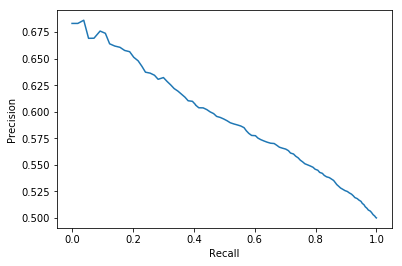

In [0]:
#Precision x Recall
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

# Make predictions on the test set and evaluate the results

In [0]:
predictions.select('label', 'rawPrediction',
                   'prediction', 'probability').show(10)

+-----+--------------------+----------+--------------------+
|label|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
|    0|[-0.0074646394870...|       1.0|[0.49813384879353...|
|    0|[0.04183998917614...|       0.0|[0.51045847163518...|
|    0|[0.09902218031489...|       0.0|[0.52473533674118...|
|    0|[0.08611936073017...|       0.0|[0.52151654362613...|
|    0|[0.09166100911485...|       0.0|[0.52289922174657...|
|    0|[0.07660471979022...|       0.0|[0.51914182006137...|
|    0|[0.09697554076245...|       0.0|[0.52422490340047...|
|    1|[0.04419572523200...|       0.0|[0.51104713320429...|
|    0|[0.07639932820593...|       0.0|[0.51909054722127...|
|    0|[0.08453010739329...|       0.0|[0.52111995257720...|
+-----+--------------------+----------+--------------------+
only showing top 10 rows



In [0]:
#from pyspark.ml.evaluation import BinaryClassificationEvaluator

#evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.5976648141538775


In [0]:
fMeasure = trainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
bestThreshold = fMeasure.where(fMeasure['F-Measure'] ==
                               maxFMeasure['max(F-Measure)']).select('threshold').head()['threshold']


<h1> AVALIANDO OS 15% MELHORES RANKEADOS </h1>

### O NUMERO TOTAL DE CLIENTES É 65274 E A TAXA DE INADIMPLENCIA GERAL É 11.36 %
### TEMOS QUE OFERECER CRÉDITO PARA 6527 CLIENTES E ATINGIR 9,656% DE INADIMPLENCIA.

In [0]:
teste = predictions.select('label', 'rawPrediction',
                          'prediction', 'probability').sort(SF.col("probability").desc()).limit(6527)

inad = teste.where(SF.col('label')==1).count()/6527*100

inad

15.550789030182319

# Overall statistics

In [0]:
# Overall statistics
print("Summary Stats")
print('Accuracy = %s' % str(trainingSummary.accuracy))
print("Precision = %s" % trainingSummary.precisionByLabel)
print("F1 Score = %s" % trainingSummary.fMeasureByLabel())
print("False Positive = %s" % trainingSummary.falsePositiveRateByLabel)
print("Recall = %s" % trainingSummary.recallByLabel)


Summary Stats
Accuracy = 0.5813164810411713
Precision = [0.5764614515673538, 0.5868298679779785]
F1 Score = [0.5941999102453698, 0.5675881767541648]
False Positive = [0.4504317357026655, 0.38693530221499184]
Recall = [0.6130646977850082, 0.5495682642973345]


In [0]:
from pyspark.mllib.evaluation import MulticlassMetrics

pred = predictions.select('prediction', 'label')
metricsp = MulticlassMetrics(pred.rdd)
# metricsp.recall(1)

tp = pred[(pred.label == 1) & (pred.prediction == 1)].count()
tn = pred[(pred.label == 0) & (pred.prediction == 0)].count()
fp = pred[(pred.label == 0) & (pred.prediction == 1)].count()
fn = pred[(pred.label == 1) & (pred.prediction == 0)].count()
print("True Positives: %f" % tp)
print("True Negatives: %f" % tn)
print("False Positives: %f" % fp)
print("False Negatives: %f" % fn)
print("Total: %d" % pred.count())

r = float(tp)/(tp + fn)
print("recall %f" % r)

p = float(tp) / (tp + fp)
print("precision %f" % p)

True Positives: 1175.000000
True Negatives: 10547.000000
False Positives: 6880.000000
False Negatives: 1011.000000
Total: 19613
recall 0.537511
precision 0.145872


In [0]:
# Fit the model
#lrModel = lr.fit(trainingData)

# Make predictions.
testData.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1| 2186|
|    0|17427|
+-----+-----+

